In [35]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
cmip_dat=xr.open_mfdataset('data/cmip-present/*.nc')

In [47]:
cmip_dat.coords['lon']

<xarray.DataArray 'lon' (lon: 720)>
array([-180. , -179.5, -179. , ...,  178.5,  179. ,  179.5])
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
    height   float64 2.0
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east

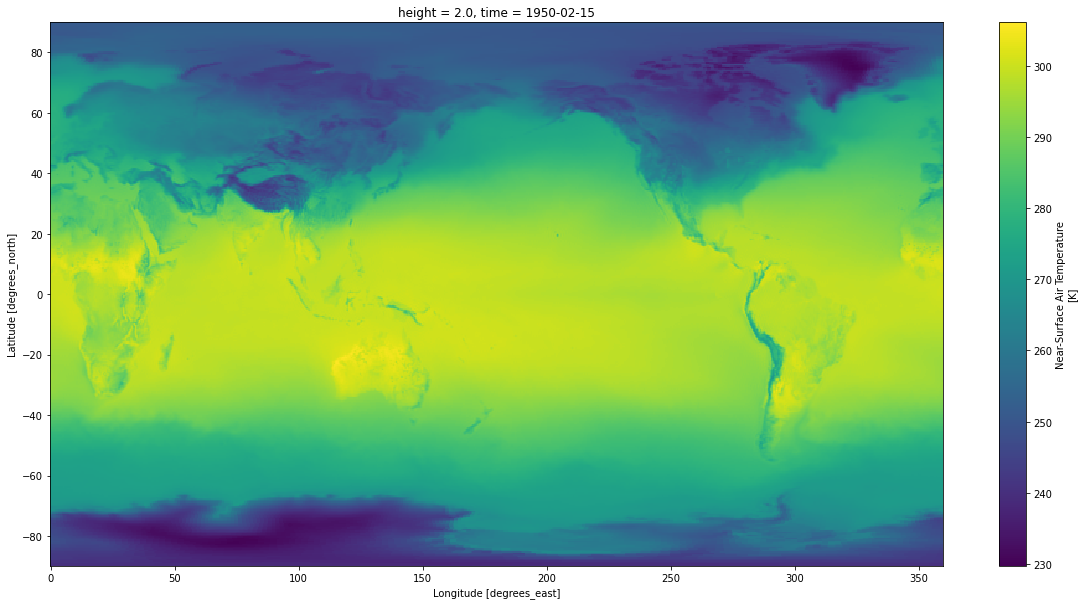

In [38]:
plt.figure(figsize=(20,10))
cmip_dat.isel(time=1)['tas'].plot()

In [15]:
cmip_yearly=cmip_dat.groupby('time.year').mean('time')

In [28]:
first_ten=cmip_yearly.isel(year=slice(0,10)).mean('year')['tas']

In [29]:
last=cmip_yearly.isel(year=-2)['tas']

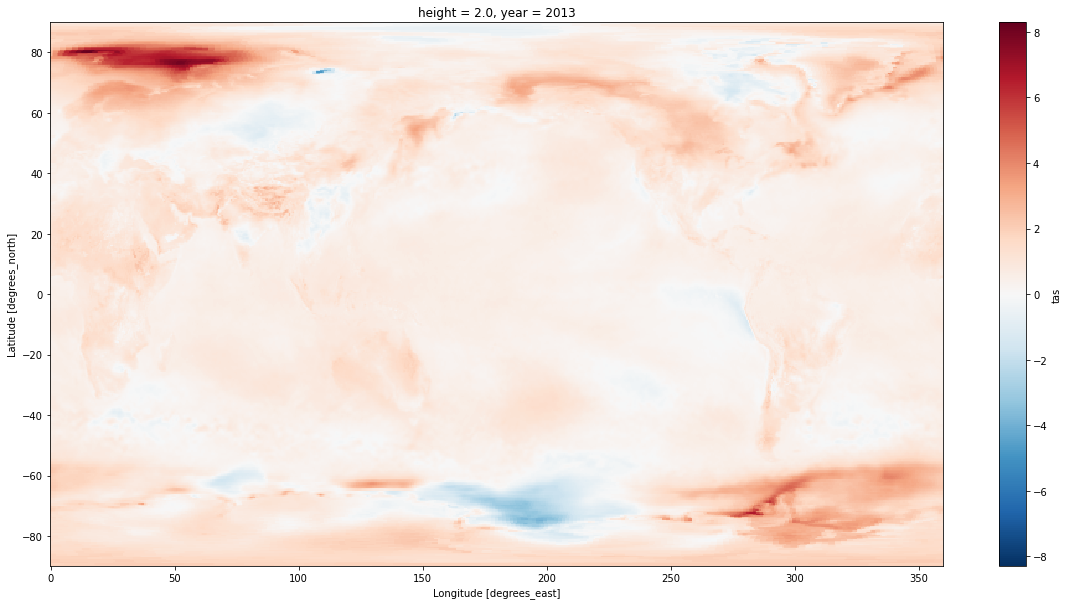

In [37]:
plt.figure(figsize=(20,10))
(last-first_ten).plot()